In [8]:
import os

import google.generativeai as genai
import warnings
warnings.filterwarnings("ignore")

GOOGLE_API_KEY=os.getenv('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

from google.generativeai.types import HarmCategory, HarmBlockThreshold

def analyze_sentiment_gemini(text):
    model = genai.GenerativeModel('gemini-pro')
    message = "Analyze the following video comment and determine the sentiment score of a given text. Return answer in a single float ranging anywhere from -1 to 1, where -1 is negative sentiment, 0 is neutral sentiment, and 1 is positive sentiment: " + text
    try:
        response = model.generate_content(message, safety_settings={
            HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
            HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
            HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE
            }
        )
        return float(response.text)
    except AttributeError as e:
        model = genai.GenerativeModel('gemini-pro')
        return 0
    except Exception as e:
        model = genai.GenerativeModel('gemini-pro')
        return -0

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer


def analyze_sentiment_vader(text):
    # create a SentimentIntensityAnalyzer object
    sid_obj = SentimentIntensityAnalyzer()
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(text)
    return sentiment_dict['compound']

In [10]:
from textblob import TextBlob


def analyze_sentiment_textblob(text):
    # create a TextBlob object
    analysis = TextBlob(text)
    # return the sentiment
    return analysis.sentiment.polarity

In [11]:
def analyze_sentiment(text):
    sentiment_gemini = analyze_sentiment_gemini(text)
    sentiment_vader = analyze_sentiment_vader(text)
    sentiment_textblob = analyze_sentiment_textblob(text)
    return sentiment_gemini, sentiment_vader, sentiment_textblob

In [12]:
from matplotlib import pyplot as plt
import pandas as pd


def save_sentiment_score(file_name, data_directory, output_directory):
    with open(data_directory + file_name) as f:
        df = pd.read_csv(f)
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    # draw a histogram of the sentiment scores
    df['sentiment_gemini'] = df['headline'].apply(analyze_sentiment_gemini)
    df['sentiment_vader'] = df['headline'].apply(analyze_sentiment_vader)
    df['sentiment_textblob'] = df['headline'].apply(analyze_sentiment_textblob)
    
    # save the dataframe to a csv file
    df.to_csv(output_directory + file_name, index=False)
    # draw a histogram of the sentiment scores
    plt.hist(df['sentiment_gemini'], bins=20, alpha=0.5, label='gemini', color='green')
    plt.hist(df['sentiment_vader'], bins=20, alpha=0.5, label='vader', color='blue')
    plt.hist(df['sentiment_textblob'], bins=20, alpha=0.5, label='textblob', color='red')
    plt.legend(loc='upper right')
    plt.title('Histogram of Sentiment Scores')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

In [13]:
data_directory = '../headlines_csv/'
output_directory = '../headlines_csv/'
# Load the json files from the data directory
files = os.listdir(data_directory)

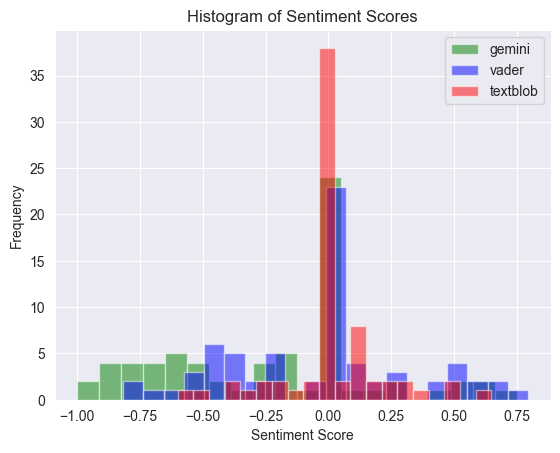

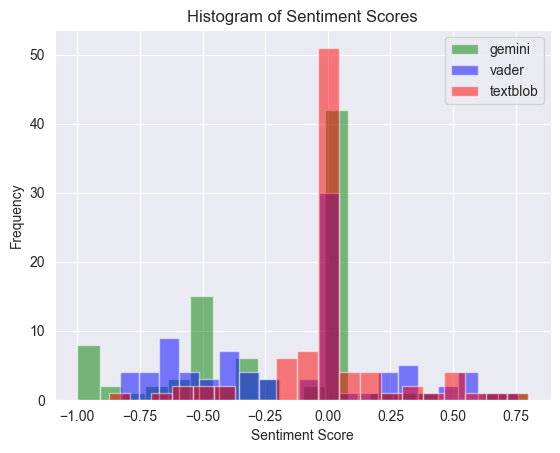

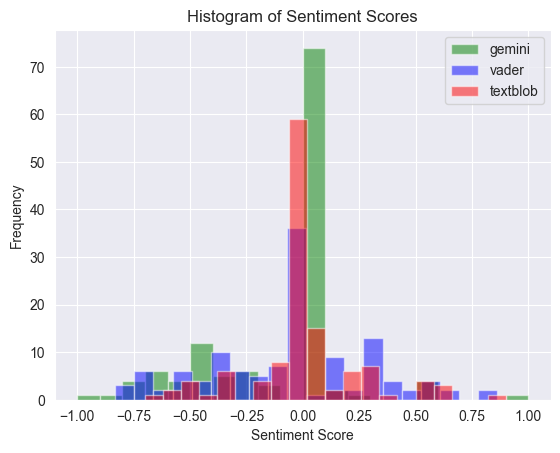

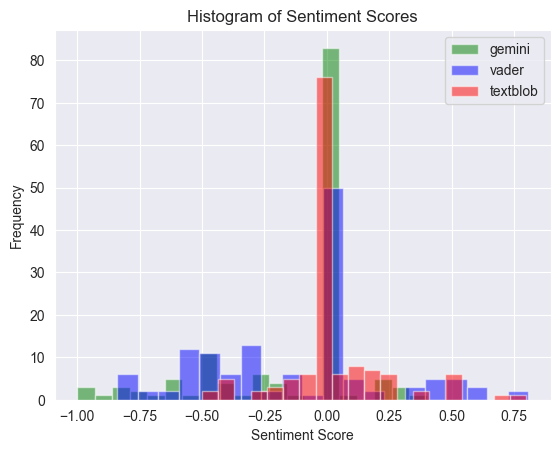

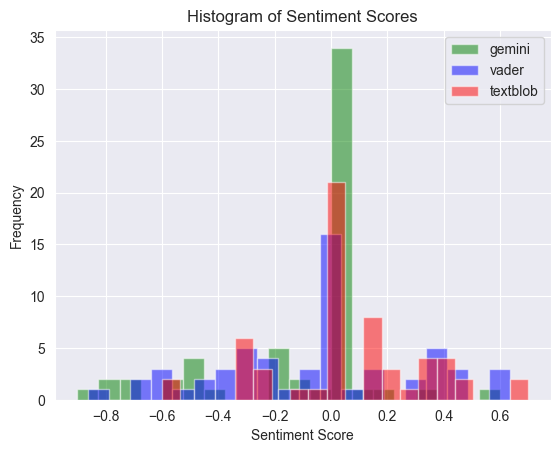

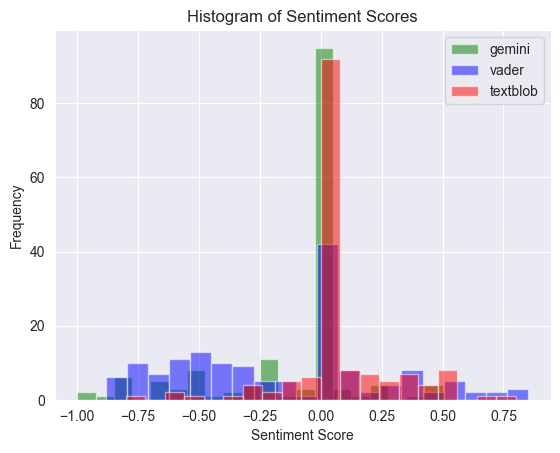

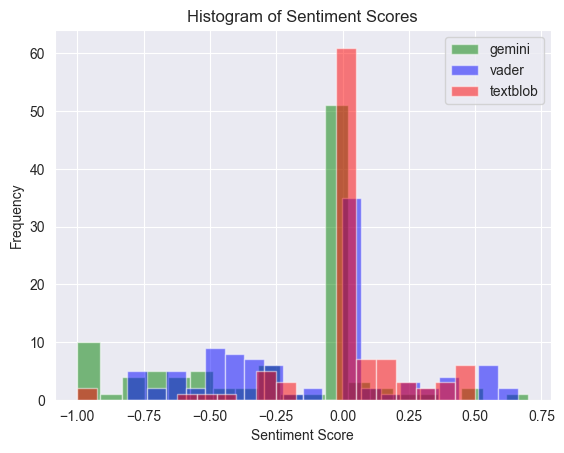

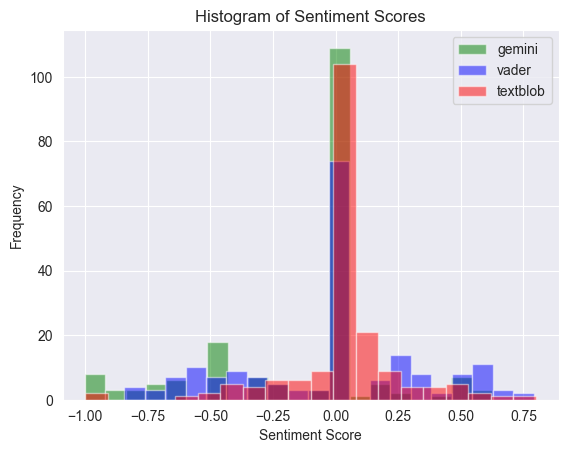

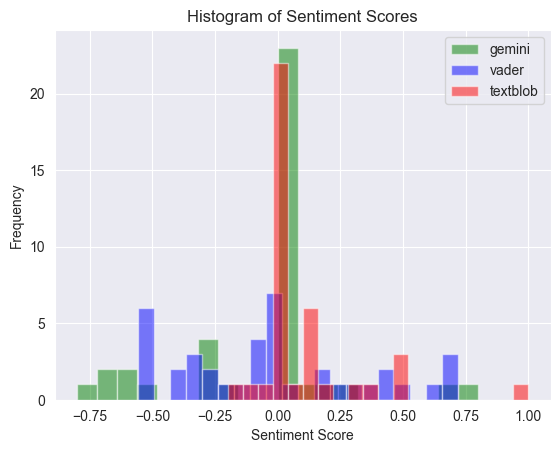

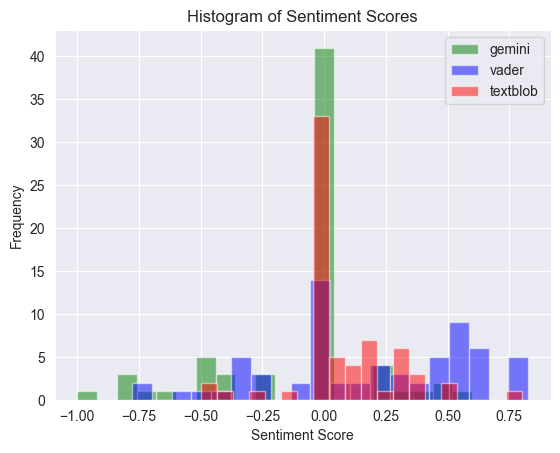

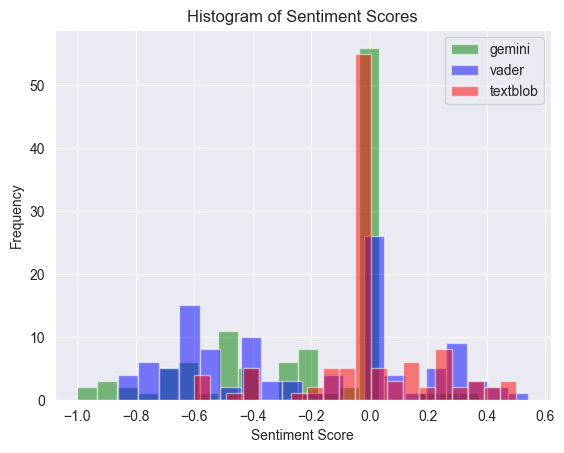

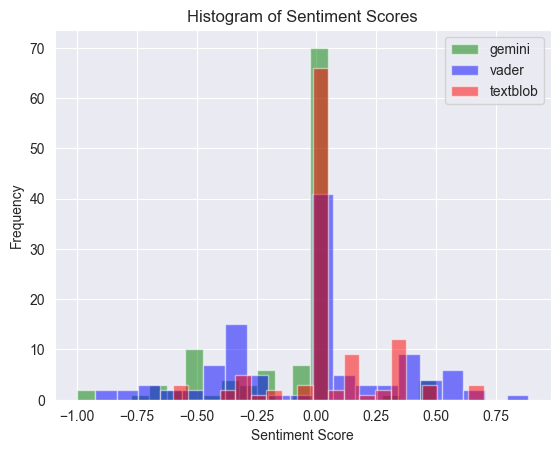

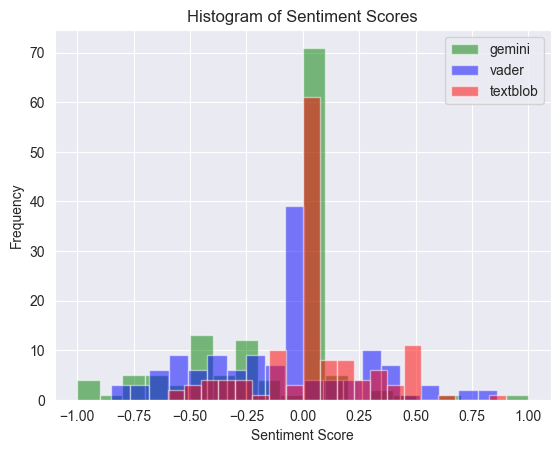

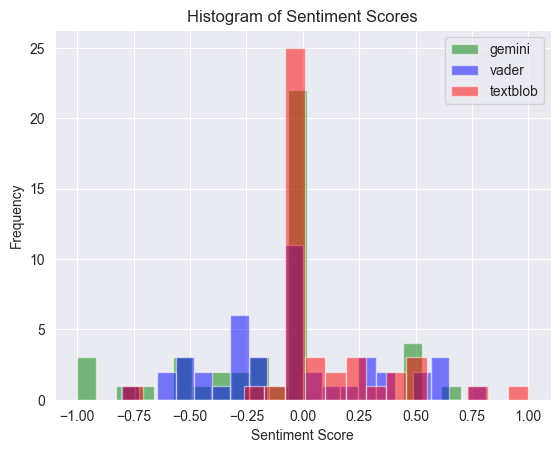

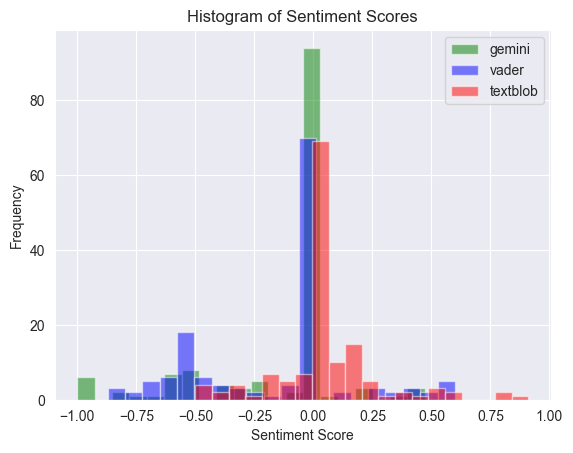

In [14]:
for file_name in files:
    save_sentiment_score(file_name, data_directory, output_directory)